# Lecture 8. PDEs and sparse matrices

## Todays lecture
- Where the sparse matrices come from
- A brief reminder: finite difference, finite elements, finite volume methods
- Basic packages

## PDEs

Partial differential equations (PDEs) are ubiquitous in mathematical modelling

From simple linear PDEs to more complicated nonlinear cases:

- diffusion
- heat conducation 
- fluid dynamics 
- reaction-diffusion
- quantum chemistry computations
- etc.

## Sparse matrices

After any convenient **local discretization**,  i.e.

- Finite difference method (FDM)
- Galerkin method with local basis function (finite element method &mdash; FEM)
- Finite volume method (FVM)

We get matrices with **a lot of zeros**, typically called **sparse matrices**.

## Toy problem

Consider Poisson equation with Dirichlet boundary conditions
$$
\begin{align}
& \mathrm{div} (k(x) \nabla u) = f(x), \quad x \in \Omega \\
& \quad u|_{\partial \Omega} = 0,
\end{align}
$$
where $k(x) > 0, \; x \in \Omega$ is given coefficients. 
Let us discretize it with FDM, FEM and FVM.

### 1D FDM
$$
\left(\frac{\partial}{\partial x} k \frac{\partial u} {\partial x}\right)_i \approx \frac{k_{i+\frac{1}{2}}\frac{\partial u}{\partial x}_{i + \frac{1}{2}} - k_{i-\frac{1}{2}}\frac{\partial u}{\partial x}_{i - \frac{1}{2}}}{h} + \mathcal{O}(h^2)
$$

which leads to the final discretization

$$
\left(\frac{\partial}{\partial x} k \frac{\partial u} {\partial x}\right)_i \
\approx \frac{k_{i+\frac{1}{2}}\left(u_{i+1} - u_{i}\right) - k_{i-\frac{1}{2}}\left(u_{i} - u_{i-1}\right)}{h^2} + \mathcal{O}(h^2), \quad i = 1, \ldots, n-1, \quad u_0 = u_n = 0.
$$

- This discretization leads to the symmetric, tridiagonal, positive-definite matrix for unknown vector $u_h = [u_1, \dots, u_{n-1}]^{\top}$. 
- This matrix have $-k_{i-\frac{1}{2}}$ on subdiagonals, and $\left(k_{i-\frac{1}{2}} + k_{i + \frac{1}{2}}\right)$ on the diagonal.

### 2D FDM

In two dimensions, $k(x, y) \in \mathbb{R}^{2 \times 2}$ for every point $(x, y) \in \Omega$  is **diffusion tensor**.

If $k(x, y)$ is a diagonal matrix
$$
k(x,y) = 
\begin{bmatrix}
K_1(x, y) & 0\\
0 & K_2(x, y)
\end{bmatrix}
$$
we have

$$
\mathrm{div}(k(x,y) \nabla u) = \frac{\partial}{\partial x} K_1 (x, y) \frac{\partial u}{\partial x} + \frac{\partial}{\partial y} K_2 (x, y) \frac{\partial u}{\partial y}, 
$$

and we discretize each term and get **block tridiagonal matrix with tridiagonal blocks.**

For the simplest case $K_1 = K_2 = I$ we get **2D Poisson problem**, and the matrix can be written 

$$\Delta_{2D} = \Delta_{1D} \otimes I + I \otimes \Delta_{1D},$$

where $\Delta_{1D} = \frac{1}{h^2}\mathrm{tridiag}(-1, 2, -1)$ is a **one-dimensional** Laplace operator.

### FEM

- Create mesh in the domain $\Omega$. Most often case is triangulation, but others are possible
<img src="./pic/fem_mesh.png">
- For each common node $i$ build basis function $\psi_i$ which is linear on adjoint triangles and $0$ on others triangles
<img src="./pic/fem_basis.png", width=300>

- Approximate solution $u$ using this basis: 
$$
u(x) \approx u_N(x) = \sum_{i=1}^N c_i \psi_i(x)
$$
- Projectional approach: substitute approximate solution $u_N(x)$ and enforce orthogonlity of residuals to this basis:

$$
\mathrm{div}( k \nabla u_N) - f \perp \mathrm{Span}\{\psi_1, \dots, \psi_N\}
$$
$$
(\psi_i, \mathrm{div}( k \nabla u_N) - f) = 0, \; i = 1,\dots, N
$$
$$
\sum_{i=1}^N c_i (\nabla \psi_i, k\nabla \psi_j) = (\psi_i, f)
$$
This is a linear system
$$
Ac = b
$$
with unknown vector $c = [c_1, \dots,c_n]^{\top}$, matrix
$$
A = [a_{ij}], \; a_{ij} = (\nabla \psi_i, k\nabla \psi_j)
$$
and right-hand side 
$$
b = [b_i], \; b_i = (\psi_i, f)
$$

<font color=red>Is matrix $A$ symmetric and positive-definite?</font>

### FVM 1D

- Consider integral over $i$-th element of mesh
$$
\int_{x_{i - 1/2}}^{x_{i + 1/2}} \left(\left( k(x) u'(x) \right)' - f(x)\right) dx
$$
- Now get equation on flows through the $i$-th point of the mesh
$$
k(x_{i + 1/2})u'(x_{i+1/2}) - k(x_{i-1/2})u'(x_{i-1/2}) = \int_{x_{i-1/2}}^{x_{i + 1/2}} f(x)dx
$$
- Approximate flows
$$
k(x_{i + 1/2})\frac{u_{i+1} - u_i}{h} - k(x_{i-1/2})\frac{u_{i} - u_{i-1}}{h} = \int_{x_{i-1/2}}^{x_{i + 1/2}} f(x)dx
$$
- We get linear system on vector $u$ with matrix, which is the same as for FDM and FEM, but with different right-hand side  

### Pros & Cons

What method in what cases should you use?

## 

## Sparse vs. Dense matrices

- A sparse matrix is a matrix with enough zeros that is worth taking advantage of them [Wilkinson]
- A **structured matrix** has enough structure that is worthwhile using it (i.e., Toeplitz + FFT)
- A dense matrix is neither sparse nor structured

## Design of sparse matrix data structure

- Most operations should give the same result for dense and sparse
- Storage should be $\mathcal{O}(\mathrm{nonzeros})$.
- Time for a sparse matrix operations should be $\mathcal{O}(N)$ flops 

The last requirement basically means fewer cache misses.

## Storing a sparse matrix

That we already discussed in detail in a separate lecture in the NLA course. However, let us repeat a little bit.

- Coordinate storage, $(i, j)$ array. 
- Compressed sparse row formata, $(ia, ja, sa)$ format.
- There is also compressed row storage

What is good for what?

## Matrix-by-vector product

The matrix-by-vector product is very easy to be implemented in the compressed sparse row format:

```python
for i in range(n):
    for k in range(ia[i]:ia[i+1]):
        y[i] += sa[k] * x[ja[k]]
```

## Summary of CSR

- CSR is good for matrix-by-vector product
- Insertion  of new elements is very expensive

## Efficiency of sparse matrix operations

Sparse matrix operations are mostly about **memory access**, not about operations, thus the efficiency in flops is typically very low.

Thus, efficiency of order 10-15% is considered **high**.

Let us test it.

In [1]:
import numpy as np
import time
n = 4000
a = np.random.randn(n, n)
v = np.random.randn(n)
t = time.time()
np.dot(a, v)
t = time.time() - t
print('Time: {0: 3.1e}, Efficiency: {1: 3.1e} Gflops'.\
      format(t,  ((2 * n ** 2)/t) / 10 ** 9))


Time:  1.3e-02, Efficiency:  2.5e+00 Gflops


In [2]:
import scipy as sp
import scipy.sparse
n = 4000
r = 100
ex = np.ones(n);
a = sp.sparse.spdiags(np.vstack((ex, -2*ex, ex)), [-1, 0, 1], n, n, 'csr'); 
rhs = np.random.randn(n, r)
t = time.time()
a.dot(rhs)
t = time.time() - t
print('Time: {0: 3.1e}, Efficiency: {1: 3.1e} Gflops'.\
      format(t,  (3 * n * r) / t / 10 ** 9))


Time:  7.9e-03, Efficiency:  1.5e-01 Gflops


## Morale
For sparse data representations
- the computational time is smaller
- the computatational efficiency is also smaller!

## Possible solutions

- Use blocking
- Use block matrix-by-vector product (multiply at once)

## What are FastPDE methods about?

- They are typically methods for large sparse linear systems 
- These systems have **certain additional structure**, i.e. it is not a random **sparse matrix** (for example, not an adjacency matrix of a Facebook graph, although some algorithms can be reused)

Next lecture considers methods to solve large sparse linear systems

## FEniCS demo

In [ ]:
%matplotlib inline
from __future__ import print_function
import fenics
import matplotlib.pyplot as plt

In [ ]:
import dolfin
import mshr
import math

domain_vertices = [dolfin.Point(0.0, 0.0),
                   dolfin.Point(10.0, 0.0),
                   dolfin.Point(10.0, 2.0),
                   dolfin.Point(8.0, 2.0),
                   dolfin.Point(7.5, 1.0),
                   dolfin.Point(2.5, 1.0),
                   dolfin.Point(2.0, 4.0),
                   dolfin.Point(0.0, 4.0),
                   dolfin.Point(0.0, 0.0)]

p = mshr.Polygon(domain_vertices);
rect_mesh = mshr.generate_mesh(p, 80)
fenics.plot(rect_mesh)

In [ ]:
V = fenics.FunctionSpace(rect_mesh, 'P', 1)
u_D = fenics.Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = fenics.DirichletBC(V, u_D, boundary)

u = fenics.TrialFunction(V)
v = fenics.TestFunction(V)
f = fenics.Constant(-6.0)   # Or f = Expression(’-6’, degree=0)
# Left-hand side
a = fenics.dot(fenics.grad(u), fenics.grad(v))*fenics.dx
# Right-hand side
L = f*v*fenics.dx

u = fenics.Function(V)
fenics.solve(a == L, u, bc)

fenics.plot(u)

In [ ]:
error_L2 = fenics.errornorm(u_D, u, 'L2')
print("Error in L2 norm = {}".format(error_L2))
error_H1 = fenics.errornorm(u_D, u, 'H1')
print("Error in H1 norm = {}".format(error_H1))

## FVM demo using FiPy
To install it run for Python 2
```
conda create --name <MYFIPYENV> --channel guyer --channel conda-forge fipy nomkl
```



In [1]:
%matplotlib inline
import fipy

cellSize = 0.05
radius = 1.

mesh = fipy.Gmsh2D('''
               cellSize = %(cellSize)g;
               radius = %(radius)g;
               Point(1) = {0, 0, 0, cellSize};
               Point(2) = {-radius, 0, 0, cellSize};
               Point(3) = {0, radius, 0, cellSize};
               Point(4) = {radius, 0, 0, cellSize};
               Point(5) = {0, -radius, 0, cellSize};
               Circle(6) = {2, 1, 3};
               Circle(7) = {3, 1, 4};
               Circle(8) = {4, 1, 5};
               Circle(9) = {5, 1, 2};
               Line Loop(10) = {6, 7, 8, 9};
               Plane Surface(11) = {10};
               ''' % locals()) 


In [2]:
phi = fipy.CellVariable(name = "solution variable",
                    mesh = mesh,
                    value = 0.) 

/home/alex/anaconda2/envs/fipy2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


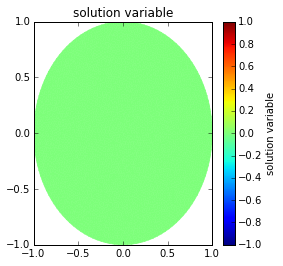

In [3]:
# viewer = fipy.Viewer(vars=phi, datamin=-1, datamax=1.)

In [4]:
D = 1.
eq = fipy.TransientTerm() == fipy.DiffusionTerm(coeff=D)

In [5]:
X, Y = mesh.faceCenters
phi.constrain(X, mesh.exteriorFaces) 
timeStepDuration = 10 * 0.9 * cellSize**2 / (2 * D)
steps = 10
for step in range(steps):
    eq.solve(var=phi, dt=timeStepDuration)
#     if viewer is not None:
#         viewer

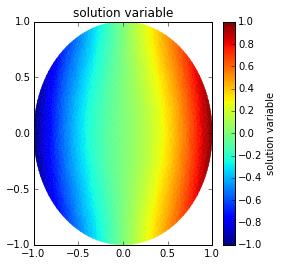

In [6]:
viewer


## Summary

- Discretization methods: FDM, FEM and FVM 
- Sparse matrices are important
- Package demos